This is mostly me learning to understand how PyMC3 works and using it to find a line. <br>
https://docs.pymc.io/notebooks/getting_started.html <br>
https://docs.pymc.io/notebooks/api_quickstart.html

In [64]:
%matplotlib notebook
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))
core_count = 12

Running on PyMC3 v3.8


In [33]:
# True parameter values
# Two variable example
# Alpha is a addition constant
# Beta affects 
np.random.seed(212)
alpha = 15
beta = 2.3
sigma = 50

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.uniform(low=0, high=100, size=size)

# Simulate outcome variable
Y_actual = alpha + beta * X1
Y_observed = Y_actual + np.random.normal(0,sigma,size)

<IPython.core.display.Javascript object>


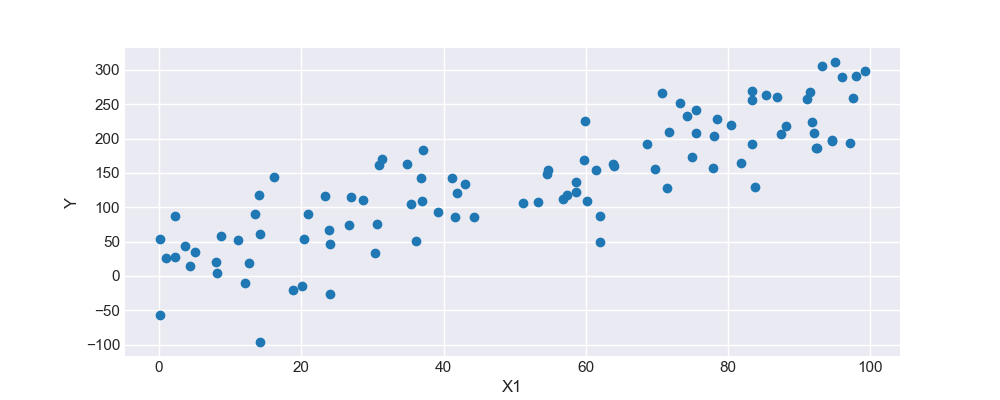

Text(0.5, 0, 'X1')

In [35]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,4))
axes.scatter(X1, Y_observed)
axes.set_ylabel('Y')
axes.set_xlabel('X1')

In [53]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=50)

    # Expected value of outcome
    mu = alpha + beta*X1

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y_observed)

The maximum a posteriori (MAP) estimate for a model, is the mode of the posterior distribution and is generally found using numerical optimization methods. This is often fast and easy to do, but only gives a point estimate for the parameters and can be biased if the mode isn’t representative of the distribution. PyMC3 provides this functionality with the find_MAP function.

Below we find the MAP for our original model. The MAP is returned as a parameter point, which is always represented by a Python dictionary of variable names to NumPy arrays of parameter values.

By default, find_MAP uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm to find the maximum of the log-posterior but also allows selection of other optimization algorithms from the scipy.optimize module. For example, below we use Powell’s method to find the MAP.

In [54]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -537.87, ||grad|| = 6.5812: 100%|█████████████████████████████████████████████| 29/29 [00:00<00:00, 3912.85it/s]


{'alpha': array(6.81853573),
 'beta': array(2.51215805),
 'sigma_log__': array(3.83922689),
 'sigma': array(46.48951924)}

In [55]:
map_estimate_powell = pm.find_MAP(model=basic_model, method='powell')

map_estimate_powell

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\scipy\optimize\_minimize.py:506: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -537.53, ||grad|| = 0.002943: 100%|█████████████████████████████████████████| 288/288 [00:00<00:00, 4301.08it/s]


{'alpha': array(6.81833456),
 'beta': array(2.512161),
 'sigma_log__': array(3.83922606),
 'sigma': array(46.48948063)}

In [68]:
with basic_model:
    # 1000 posterior samples
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 6000/6000 [00:03<00:00, 1575.30draws/s]


In [69]:
trace['alpha'][-5:]

array([ 3.90723329, 13.05401008,  9.74041699,  1.07118589, 22.22903218])

<IPython.core.display.Javascript object>


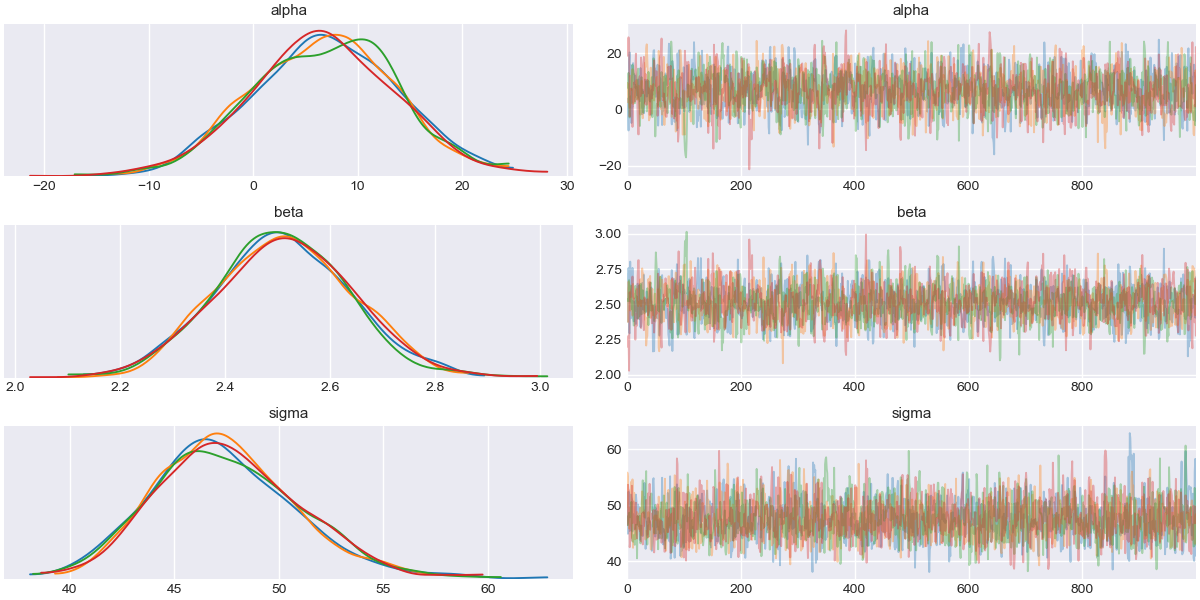

C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\ProgramData\Anaconda3\envs\Astronomy\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FD322C4C8>,
      dtype=object)

In [70]:
pm.traceplot(trace)

In [71]:
pm.summary(trace).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,6.78,6.83,-6.00,19.29,0.16,0.11,1883.0,1883.0,1881.0,2415.0,1.0
beta,2.51,0.13,2.28,2.75,0.00,0.00,1828.0,1824.0,1830.0,2041.0,1.0
sigma,47.50,3.46,41.20,54.03,0.07,0.05,2489.0,2433.0,2570.0,2258.0,1.0


In [72]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,6.782,6.826,-6.005,19.289,0.157,0.111,1883.0,1883.0,1881.0,2415.0,1.0
beta,2.511,0.127,2.276,2.747,0.003,0.002,1828.0,1824.0,1830.0,2041.0,1.0
sigma,47.497,3.464,41.199,54.034,0.069,0.050,2489.0,2433.0,2570.0,2258.0,1.0


In [73]:
regression_alpha = pm.summary(trace)["mean"]["alpha"]
regression_beta = pm.summary(trace)["mean"]["beta"]

<IPython.core.display.Javascript object>


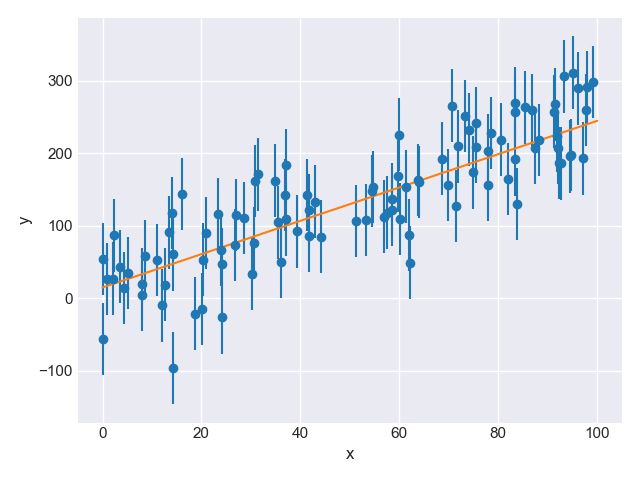

In [74]:
fig, ax = plt.subplots()

ax.errorbar(X1, Y_observed, 50, fmt='o')
ax.plot([0,100], 15 + 2.3*np.array([0,100]))
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.tight_layout()